In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from acquire import get_titanic_data
from prepare import prep_titanic, split_data

# Random Forests
What is it?
- a machine learning algorithm used for predicting categorical target variables
- Pipeline: Plan - Acquire - Prepare - Explore - **Model** - Deliver

How do we use it?
- acquire, prepare, explore our data
- split data for modeling
- build models on train
    - create rules based on our input data
- evaluate models on train & validate
    - see how our rules work on unseen data
- pick best of the best model, and evaluate bestest model on test

random forest hyperparameters
- n_estimators: The number of trees in the forest (default=100)
- bootstrap: whether bootstrap samples are used when building trees (default=True)
- random_state: controls randomness of bootstrapping samples (default=None)

seen before
- criterion (default=”gini”)
- max_depth (default=None)
- min_samples_split (default=2)
- min_samples_leaf (default=1)
- max_leaf_nodes (default= None)

## Exercises
work with `titanic` data

In [2]:
df = get_titanic_data()
df = prep_titanic(df)
tr,v,t = split_data(df,'survived')
tr.sample()

csv file found and loaded
data cleaned and prepped
data split
train -> (534, 11); 59.93%
validate -> (178, 11); 19.98%
test -> (179, 11); 20.09%


,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
352,0,3,male,1,1,7.2292,C,0,1,0,0


In [3]:
Xtr = tr.drop(columns=['survived','sex','embarked'])
Xv = v.drop(columns=['survived','sex','embarked'])
Xt = t.drop(columns=['survived','sex','embarked'])
ytr = tr.survived
yv = v.survived
yt = t.survived

In [4]:
Xtr.sample()

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
468,3,0,0,7.725,1,1,1,0


In [5]:
ytr.sample()

204    1
Name: survived, dtype: int64

In [6]:
baseline = (ytr==0).mean()
baseline

0.6161048689138576

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the `random_state` accordingly and setting `min_samples_leaf` = 1 and `max_depth` = 10.

In [7]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=10,random_state=42)
rf.fit(Xtr,ytr)
y_pred = rf.predict(Xtr)
y_prob = rf.predict_proba(Xtr)
rf.feature_importances_

array([0.11106251, 0.05307524, 0.06396437, 0.39850609, 0.02432817,
       0.29892752, 0.01562892, 0.03450717])

In [8]:
Xtr.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [9]:
rf.score(Xtr,ytr)

0.9269662921348315

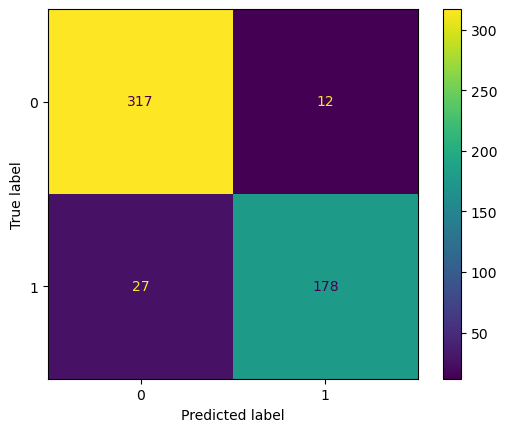

In [10]:
ConfusionMatrixDisplay(confusion_matrix(ytr,y_pred,labels=rf.classes_),display_labels=rf.classes_).plot()
plt.show()

In [11]:
pd.DataFrame(classification_report(ytr,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.921512,0.936842,0.926966,0.929177,0.927397
recall,0.963526,0.868293,0.926966,0.915909,0.926966
f1-score,0.942051,0.901266,0.926966,0.921658,0.926393
support,329.000000,205.000000,0.926966,534.000000,534.000000


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [12]:
TN, FP, FN, TP = confusion_matrix(ytr, y_pred).ravel()
TN, FP, FN, TP

(317, 12, 27, 178)

In [13]:
act_neg = TN + FP
act_pos = FN + TP
print(f"Actual Negative: {act_neg}")
print(f"Actual Positive: {act_pos}")
print(ytr.value_counts())

Actual Negative: 329
Actual Positive: 205
0    329
1    205
Name: survived, dtype: int64


In [14]:
ALL = TN + FP + FN + TP
acc = (TP+TN)/ALL
tru_pos = rec = TP/(TP+FN)
fal_pos = FP/(FP+TN)
tru_neg = TN/(FP+TN)
fal_neg = FN/(TP+FN)
prc = TP/(TP+FP)
f1_score = 2*(prc*rec)/(prc+rec)
sup_pos = TP+FN
sup_neg = FP+TN

print(f"Accuracy: {acc}")
print(f"True Pos Rate: {tru_pos}")
print(f"False Pos Rate: {fal_pos}")
print(f"True Neg Rate: {tru_neg}")
print(f"False Neg Rate: {fal_neg}")
print(f"Precision: {prc}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1_score}")
print(f"Support Pos (1): {sup_pos}")
print(f"Support Neg (0): {sup_neg}")

Accuracy: 0.9269662921348315
True Pos Rate: 0.8682926829268293
False Pos Rate: 0.0364741641337386
True Neg Rate: 0.9635258358662614
False Neg Rate: 0.13170731707317074
Precision: 0.9368421052631579
Recall: 0.8682926829268293
F1 Score: 0.90126582278481
Support Pos (1): 205
Support Neg (0): 329


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [15]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=10,random_state=42)
rf.fit(Xtr,ytr)
y_pred = rf.predict(Xtr)
y_prob = rf.predict_proba(Xtr)
rf.feature_importances_

array([0.11106251, 0.05307524, 0.06396437, 0.39850609, 0.02432817,
       0.29892752, 0.01562892, 0.03450717])

In [16]:
import itertools
metrics = []
for l, d in itertools.product(range(1,21), range(1,11)):
    # model
    rf = RandomForestClassifier(min_samples_leaf=l,max_depth=d,random_state=42)
    rf.fit(Xtr,ytr)
    y_acc = rf.score(Xtr,ytr)
    # table-ize
    output = {
        'min_leaf':l,
        'max_depth':d,
        'train_acc':y_acc
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df.sort_values(by=['train_acc'], ascending=False)

,min_leaf,max_depth,train_acc
9,1,10,0.926966
8,1,9,0.925094
7,1,8,0.908240
6,1,7,0.900749
19,2,10,0.882022
...,...,...,...
150,16,1,0.749064
160,17,1,0.749064
20,3,1,0.749064
180,19,1,0.747191


### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [17]:
# min_sample_leaf=1 and max_depth=10 give the best accuracy of 92.7%

### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [18]:
metrics = []
for l, d in itertools.product(range(1,21), range(1,11)):
    # model
    rf = RandomForestClassifier(min_samples_leaf=l,max_depth=d,random_state=42)
    rf.fit(Xtr,ytr)
    ytr_acc = rf.score(Xtr,ytr)
    yv_acc = rf.score(Xv,yv)
    # table-ize
    output = {
        'min_leaf':l,
        'max_depth':d,
        'train_acc':ytr_acc,
        'val_acc':yv_acc
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df['diff'] = df.train_acc - df.val_acc
df.sort_values(by=['val_acc'], ascending=False).head(10)

,min_leaf,max_depth,train_acc,val_acc,diff
72,8,3,0.810861,0.842697,-0.031835
52,6,3,0.810861,0.837079,-0.026217
62,7,3,0.810861,0.837079,-0.026217
23,3,4,0.825843,0.837079,-0.011236
24,3,5,0.835206,0.837079,-0.001873
4,1,5,0.838951,0.837079,0.001873
3,1,4,0.831461,0.837079,-0.005618
42,5,3,0.814607,0.831461,-0.016854
102,11,3,0.808989,0.831461,-0.022472
92,10,3,0.810861,0.831461,-0.020599


In [19]:
rf = RandomForestClassifier(min_samples_leaf=8,max_depth=3,random_state=42)
rf.fit(Xtr,ytr)
baseline,rf.score(Xtr,ytr),rf.score(Xv,yv),rf.score(Xt,yt)

(0.6161048689138576,
 0.8108614232209738,
 0.8426966292134831,
 0.7988826815642458)

In [20]:
# from Andy (modified)
def random_forest_scores(Xtr, ytr, Xv, yv):
    #define variables
    metrics = []
    for leaf, depth in itertools.product(range(1,11), range(1,11)):
        rf = RandomForestClassifier(min_samples_leaf=leaf, max_depth=depth,random_state=42)
        rf.fit(Xtr, ytr)
        train_score = rf.score(Xtr, ytr)
        validate_score = rf.score(Xv, yv)
        # table-ize
        output = {
            'min_leaf':leaf,
            'max_depth':depth,
            'train_score':train_score,
            'validate_score':validate_score
        }
        metrics.append(output)
    #Put results into a dataframe
    df = pd.DataFrame(metrics)
    # Calculate the difference between the train and validation scores
    df['diff_score'] = abs(df.train_score - df.validate_score)
    df['avg_score'] = (df.train_score + df.validate_score)/2
    return df

In [21]:
rf_scores = random_forest_scores(Xtr,ytr,Xv,yv)

In [22]:
rf_scores

,min_leaf,max_depth,train_score,validate_score,diff_score,avg_score
0,1,1,0.749064,0.735955,0.013109,0.742509
1,1,2,0.792135,0.797753,0.005618,0.794944
2,1,3,0.814607,0.820225,0.005618,0.817416
3,1,4,0.831461,0.837079,0.005618,0.834270
4,1,5,0.838951,0.837079,0.001873,0.838015
...,...,...,...,...,...,...
95,10,6,0.822097,0.831461,0.009363,0.826779
96,10,7,0.818352,0.820225,0.001873,0.819288
97,10,8,0.818352,0.825843,0.007491,0.822097
98,10,9,0.820225,0.825843,0.005618,0.823034


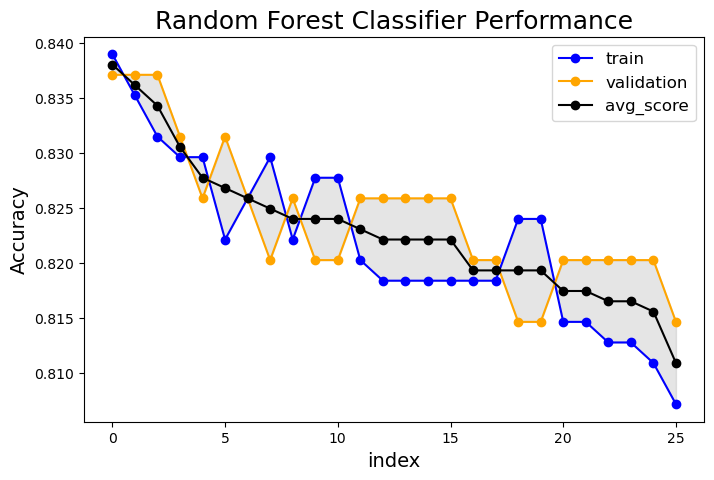

In [57]:
rf_sorted = rf_scores[(rf_scores.diff_score<.01)&(rf_scores.avg_score>.8)].sort_values(['avg_score', 'diff_score'], ascending=[False, True]).reset_index()
# plot from Andy (modified)
plt.figure(figsize=(8, 5))
plt.plot(rf_sorted.index, rf_sorted.train_score, label='train', marker='o', color='blue')
plt.plot(rf_sorted.index, rf_sorted.validate_score, label='validation', marker='o', color='orange')
plt.fill_between(rf_sorted.index, rf_sorted.train_score, rf_sorted.validate_score, alpha=0.2, color='gray')
plt.plot(rf_sorted.index, rf_sorted.avg_score, label='avg_score', marker='o', color='black')
plt.xlabel('index', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Random Forest Classifier Performance', fontsize=18)
plt.legend(fontsize=12)
plt.show()

In [58]:
rf_sorted

,index,min_leaf,max_depth,train_score,validate_score,diff_score,avg_score
0,4,1,5,0.838951,0.837079,0.001873,0.838015
1,24,3,5,0.835206,0.837079,0.001873,0.836142
2,3,1,4,0.831461,0.837079,0.005618,0.834270
3,13,2,4,0.829588,0.831461,0.001873,0.830524
4,63,7,4,0.829588,0.825843,0.003745,0.827715
5,95,10,6,0.822097,0.831461,0.009363,0.826779
6,85,9,6,0.825843,0.825843,0.000000,0.825843
7,64,7,5,0.829588,0.820225,0.009363,0.824906
8,83,9,4,0.822097,0.825843,0.003745,0.823970
9,34,4,5,0.827715,0.820225,0.007491,0.823970


In [25]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=5,random_state=42)
rf.fit(Xtr,ytr)
baseline,rf.score(Xtr,ytr),rf.score(Xv,yv),rf.score(Xt,yt)

(0.6161048689138576,
 0.8389513108614233,
 0.8370786516853933,
 0.7932960893854749)

Extra practice on telco

In [26]:
from acquire import get_telco_data
from prepare import prep_telco

In [27]:
df = get_telco_data()
df = prep_telco(df)
tr,v,t = split_data(df,'churn')
tr.sample()

csv file found and loaded
data cleaned and prepped
data split
train -> (4225, 47); 59.99%
validate -> (1409, 47); 20.01%
test -> (1409, 47); 20.01%


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2742,Female,0,No,No,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1


In [28]:
tel_obj = tr.select_dtypes(include='object').columns.to_list()
tel_obj.append('churned')
Xtr = tr.drop(columns=tel_obj)
Xv = v.drop(columns=tel_obj)
Xt = t.drop(columns=tel_obj)
ytr = tr.churned
yv = v.churned
yt = t.churned

In [29]:
Xtr.sample()

,senior_citizen,tenure,monthly_charges,total_charges,Female,partnered,has_dependents,has_phone_service,does_paperless_billing,multiple_lines_No phone service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
813,0,63,89.4,5597.65,0,1,1,1,1,0,...,1,0,1,0,1,0,0,1,0,0


In [30]:

ytr.sample()

374    0
Name: churned, dtype: int64

In [31]:
baseline = (ytr==0).mean()
baseline

0.7346745562130178

In [32]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=10,random_state=42)
rf.fit(Xtr,ytr)
y_pred = rf.predict(Xtr)

In [33]:
pd.DataFrame(list(rf.feature_importances_),list(Xtr.columns)).sort_values(by=0,ascending=False)

,0
tenure,0.182579
total_charges,0.173709
monthly_charges,0.116921
payment_type_Electronic check,0.062192
internet_service_type_Fiber optic,0.056622
contract_type_Two year,0.049776
tech_support_Yes,0.033012
contract_type_One year,0.031210
online_security_Yes,0.028543
does_paperless_billing,0.027475


In [34]:
rf.score(Xtr,ytr)

0.8837869822485207

In [35]:
rf_score = random_forest_scores(Xtr,ytr,Xv,yv)

In [36]:
rf_score[rf_score.diff_score<.05].sort_values(by=['avg_score','diff_score'],ascending=[False,True]).head(20)

,min_leaf,max_depth,train_score,validate_score,diff_score,avg_score
16,2,7,0.834793,0.789212,0.045581,0.812003
77,8,8,0.835976,0.787793,0.048184,0.811885
98,10,9,0.835740,0.787083,0.048657,0.811411
6,1,7,0.835503,0.786373,0.049130,0.810938
36,4,7,0.834320,0.786373,0.047946,0.810346
96,10,7,0.831716,0.786373,0.045343,0.809045
46,5,7,0.832426,0.784244,0.048182,0.808335
56,6,7,0.831479,0.784244,0.047235,0.807862
86,9,7,0.829586,0.784244,0.045342,0.806915
76,8,7,0.830769,0.782825,0.047945,0.806797
